Import packages

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

Read all dataset using pandas

In [41]:
df1 = pd.read_csv('Dataset1_global_mean_temp.csv')
df2 = pd.read_csv('Dataset2_month_temp.csv')
df3 = pd.read_csv('Dataset3_nasdaq_1985_2014.csv')
df4 = pd.read_csv('Dataset4_yahoo304.96.8.14.csv')
df5 = pd.read_csv('Dataset5_yearssn.csv')
df6 = pd.read_csv('Dataset6_ftse.csv')
df7 = pd.read_excel('Make Such a Table for every Dataset in Jupyter.xlsx')

In [34]:
df1.head()

A
0 -0.30
1 -0.23
2 -0.23
3 -0.51
4 -0.40

In [35]:
df2.head()

A
0  0.46
1  0.31
2  0.33
3  0.27
4  0.25

In [36]:
df3.head()

A
0  3857.94
1  3874.27
2  3874.94
3  3908.77
4  3879.67

In [37]:
df4.head()

A
0  35.66
1  35.79
2  35.70
3  36.53
4  35.62

In [38]:
df5.head()

A
0  11.0
1  16.0
2  23.0
3  36.0
4  58.0

In [39]:
df6.head()

A
0  6597.37
1  6636.16
2  6682.48
3  6677.52
4  6679.18

ADF and KPSS test on dataframe first

In [40]:
X = df1['A'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject - Time Series is Stationary")
else:
    print ("Failed to Reject - Time Series is Non-Stationary")

ADF Statistic: 0.172308
p-value: 0.970665
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Failed to Reject - Time Series is Non-Stationary


In [44]:
def kpss_test(atr):
    timeseries = df1[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('A')

Results of KPSS Test for  A
Test Statistic            0.932331
p-value                   0.010000
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


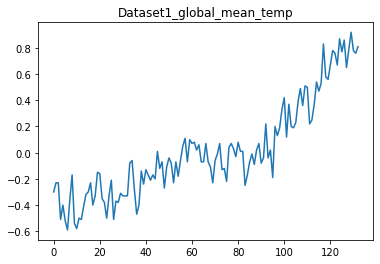

In [61]:
df1.plot(title='Dataset1_global_mean_temp', figsize=(6,4), legend=None);

Using single exponential

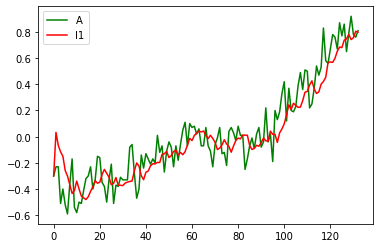

In [76]:
S = df1['A'].values[0]
l1 = []
l1.append(S)
i = 2
α = 0.3
SE1 = (df1['A'].values[1]-S)**2
for i in df1.index:
  Y = df1['A'].values[i-1]
  S1 = 0.3 * Y + 0.7 * S
  SE1 = SE1 + (df1['A'].values[i]-S1)**2
  l1.append(S1)
  S = S1
MSE1 = SE1/11

df1['l1'] = pd.DataFrame(l1)

ax = plt.gca()
df1.plot(kind = 'line',
        y = 'A', 
        color = 'green',ax = ax)
df1.plot(kind = 'line', 
        y = 'l1', 
        color = 'red',ax = ax)

ADF and KPSS test on dataframe second

In [50]:
X = df2['A'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject - Time Series is Stationary")
else:
    print ("Failed to Reject - Time Series is Non-Stationary")

ADF Statistic: -4.117031
p-value: 0.000908
Critical Values:
	1%: -3.461
	5%: -2.875
	10%: -2.574
Reject - Time Series is Stationary


In [51]:
def kpss_test(atr):
    timeseries = df2[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('A')

Results of KPSS Test for  A
Test Statistic            0.645350
p-value                   0.018514
Lags Used                15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


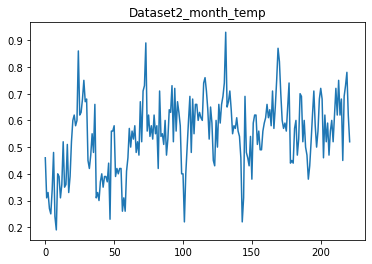

In [63]:
df2.plot(title='Dataset2_month_temp', figsize=(6,4), legend=None);

ADF and KPSS test on dataframe third

In [52]:
X = df3['A'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject - Time Series is Stationary")
else:
    print ("Failed to Reject - Time Series is Non-Stationary")

ADF Statistic: -2.382746
p-value: 0.146666
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Failed to Reject - Time Series is Non-Stationary


In [53]:
def kpss_test(atr):
    timeseries = df3[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('A')

Results of KPSS Test for  A
Test Statistic           12.140845
p-value                   0.010000
Lags Used                36.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


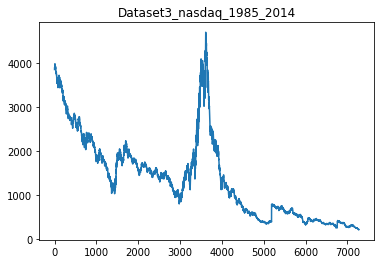

In [64]:
df3.plot(title='Dataset3_nasdaq_1985_2014', figsize=(6,4), legend=None);

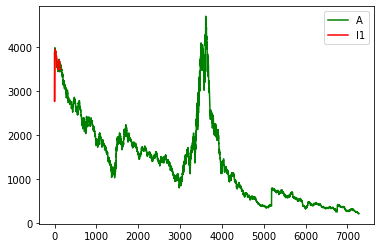

In [78]:
S = df3['A'].values[0]
l1 = []
l1.append(S)
i = 2
α = 0.3
SE1 = (df3['A'].values[1]-S)**2
for i in df1.index:
  Y = df3['A'].values[i-1]
  S1 = 0.3 * Y + 0.7 * S
  SE1 = SE1 + (df3['A'].values[i]-S1)**2
  l1.append(S1)
  S = S1
MSE1 = SE1/11

df3['l1'] = pd.DataFrame(l1)

ax = plt.gca()
df3.plot(kind = 'line',
        y = 'A', 
        color = 'green',ax = ax)
df3.plot(kind = 'line', 
        y = 'l1', 
        color = 'red',ax = ax)

Double Exponential Smoothing

In [82]:
list1 = []
s = df1['A'].values[0] # S2 = Y1
b = df1['A'].values[1] - df1['A'].values[0] # b2 = Y2-Y1
list1.append(s)
i=2
α = 0.3
γ = 0.3
SE1 = 0
for i in df1.index:
  SE1 = SE1 + (df1['A'].values[i-1] - s)**2
  s1 = 0.3 * df1['A'].values[i-1] + 0.7 * (s + b) # St = α * Y(t-1) + (1-α) * (S(t-1) + b(t-1)), 0< α <1
  list1.append(s1)
  b = 0.3 * (s1 - s) + 0.7 * b # bt = γ * (S(t) - S(t-1)) + (1 - γ) * b(t-1), 0< γ <1
  s = s1
MSE1 = SE1/len(df1['A'])
df1['list1'] = pd.DataFrame(list1)
print(MSE1)

0.03215945211540166


ADF and KPSS test on dataframe fourth

In [54]:
X = df4['A'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject - Time Series is Stationary")
else:
    print ("Failed to Reject - Time Series is Non-Stationary")

ADF Statistic: -3.286575
p-value: 0.015489
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Reject - Time Series is Stationary


In [55]:
def kpss_test(atr):
    timeseries = df4[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('A')

Results of KPSS Test for  A
Test Statistic            3.701841
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


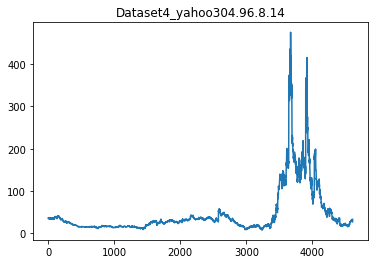

In [65]:
df4.plot(title='Dataset4_yahoo304.96.8.14', figsize=(6,4), legend=None);

ADF and KPSS test on dataframe fifth

In [56]:
X = df5['A'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject - Time Series is Stationary")
else:
    print ("Failed to Reject - Time Series is Non-Stationary")

ADF Statistic: -2.851623
p-value: 0.051270
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Failed to Reject - Time Series is Non-Stationary


In [57]:
def kpss_test(atr):
    timeseries = df5[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('A')

Results of KPSS Test for  A
Test Statistic            0.403845
p-value                   0.075498
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


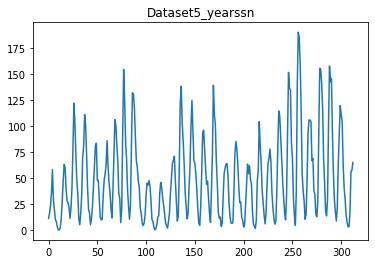

In [67]:
df5.plot(title='Dataset5_yearssn', figsize=(6,4), legend=None);

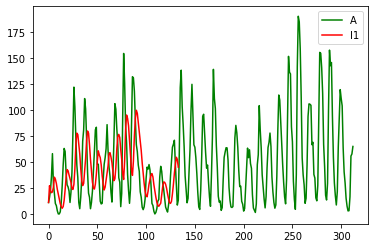

In [79]:
S = df5['A'].values[0]
l1 = []
l1.append(S)
i = 2
α = 0.3
SE1 = (df5['A'].values[1]-S)**2
for i in df1.index:
  Y = df5['A'].values[i-1]
  S1 = 0.3 * Y + 0.7 * S
  SE1 = SE1 + (df5['A'].values[i]-S1)**2
  l1.append(S1)
  S = S1
MSE1 = SE1/11

df5['l1'] = pd.DataFrame(l1)

ax = plt.gca()
df5.plot(kind = 'line',
        y = 'A', 
        color = 'green',ax = ax)
df5.plot(kind = 'line', 
        y = 'l1', 
        color = 'red',ax = ax)

In [83]:
list1 = []
s = df5['A'].values[0] # S2 = Y1
b = df5['A'].values[1] - df5['A'].values[0] # b2 = Y2-Y1
list1.append(s)
i=2
α = 0.3
γ = 0.3
SE1 = 0
for i in df5.index:
  SE1 = SE1 + (df5['A'].values[i-1] - s)**2
  s1 = 0.3 * df5['A'].values[i-1] + 0.7 * (s + b) # St = α * Y(t-1) + (1-α) * (S(t-1) + b(t-1)), 0< α <1
  list1.append(s1)
  b = 0.3 * (s1 - s) + 0.7 * b # bt = γ * (S(t) - S(t-1)) + (1 - γ) * b(t-1), 0< γ <1
  s = s1
MSE1 = SE1/len(df5['A'])
df5['list1'] = pd.DataFrame(list1)
print(MSE1)

1980.3702360396433


ADF and KPSS test on dataframe sixth

In [58]:
X = df6['A'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject - Time Series is Stationary")
else:
    print ("Failed to Reject - Time Series is Non-Stationary")

ADF Statistic: -2.240718
p-value: 0.191800
Critical Values:
	1%: -3.478
	5%: -2.883
	10%: -2.578
Failed to Reject - Time Series is Non-Stationary


In [59]:
def kpss_test(atr):
    timeseries = df6[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('A')

Results of KPSS Test for  A
Test Statistic            0.368568
p-value                   0.090704
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


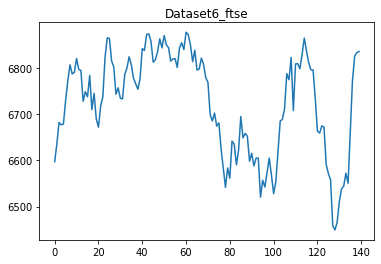

In [68]:
df6.plot(title='Dataset6_ftse', figsize=(6,4), legend=None);

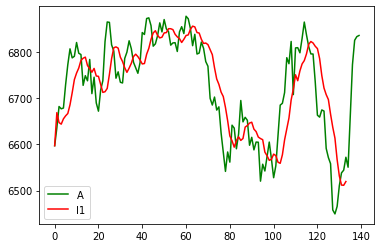

In [80]:
S = df6['A'].values[0]
l1 = []
l1.append(S)
i = 2
α = 0.3
SE1 = (df6['A'].values[1]-S)**2
for i in df1.index:
  Y = df6['A'].values[i-1]
  S1 = 0.3 * Y + 0.7 * S
  SE1 = SE1 + (df6['A'].values[i]-S1)**2
  l1.append(S1)
  S = S1
MSE1 = SE1/11

df6['l1'] = pd.DataFrame(l1)

ax = plt.gca()
df6.plot(kind = 'line',
        y = 'A', 
        color = 'green',ax = ax)
df6.plot(kind = 'line', 
        y = 'l1', 
        color = 'red',ax = ax)